In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(conn, reflect = True)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Mea = Base.classes.measurement
Sta = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(conn)

# Exploratory Precipitation Analysis

In [61]:
# Find the most recent date in the data set.
recent_date = session.query(Mea).order_by(Mea.date.desc()).first().__dict__
recent_date

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7ff0b2f5e6a0>,
 'station': 'USC00519397',
 'prcp': 0.0,
 'tobs': 81.0,
 'id': 2724,
 'date': '2017-08-23'}

Text(0, 0.5, 'Percipitation')

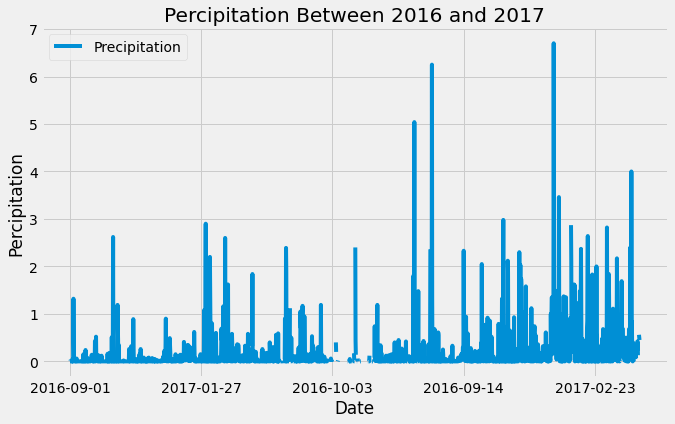

In [128]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.

#Parse the recent date with datetime
recent_parsed = dt.datetime.strptime(recent_date['date'],"%Y-%m-%d")
#Create a new string while reducing year by one and parsing the month with 0 before the number.
target_date = f"{recent_parsed.year-1}-{recent_parsed.month:02}"

# Run the session
result = session.query(Mea).filter(func.strftime("%Y-%m",Mea.date) > target_date).all();

# Perform a query to retrieve the data and precipitation scores
precipitation_list = []
for row in result:
    precipitation_list.append([row.date,row.prcp]);
precipitation_list
# Save the query results as a Pandas DataFrame and set the index to the date column
preci_df = pd.DataFrame(precipitation_list, columns= ['Date','Precipitation'])

# Sort the dataframe by date
prec_df_sort = preci_df.set_index('Date')

# Use Pandas Plotting with Matplotlib to plot the data
prec_df_sort.plot(figsize = (10,6))
plt.title('Percipitation Between 2016 and 2017')
plt.ylabel('Percipitation')



In [129]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prec_df_sort.describe()

,Precipitation
count,1968.000000
mean,0.171479
std,0.451817
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset


In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()